# Data Preparation

## Downloading Compiled and Cleaned Crisis Data and WDI

In [2]:
import pandas as pd
import numpy as np

In [3]:
crisis = pd.read_csv("https://raw.githubusercontent.com/22f1000610/EWS/refs/heads/main/LaevenValencia2018_sysBankingCrisesDB.csv")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/22f1000610/EWS/refs/heads/main/Panel%20Data%20for%20All%20WDI%20Indicators.csv", encoding='utf-8')

## Prepare country lists
Get the unique country names from both the `crisis` and `df` dataframes.


In [5]:
# Get unique country codes from the crisis DataFrame
crisis_countries = crisis['isocodes'].unique()

# Get unique country codes from the df DataFrame
df_countries = df['Country Name'].unique()

# Check which crisis countries are not in df
missing_countries = [country for country in crisis_countries if country not in df_countries]

if missing_countries:
    print("The following countries from the crisis dataset are NOT present in the WDI dataset:")
    print(missing_countries)
else:
    print("All countries from the crisis dataset are present in the WDI dataset.")

The following countries from the crisis dataset are NOT present in the WDI dataset:
['Taiwan', 'Ex-Yugoslavia']


Analyze the file "/content/Panel Data for All WDI Indicators.csv" to identify and resolve inconsistencies in country names for the same country code by selecting the most frequent name. Then, read the file "/content/LaevenValencia2018_sysBankingCrisesDB.csv" and identify which countries from this file are not present in the first file. For the missing countries, search for similar names in the first file.

**Reasoning**:
Extract unique country codes from the `crisis` DataFrame and unique country names from the `df` DataFrame as lists.



In [6]:
crisis_countries = crisis['isocodes'].unique().tolist()
df_countries = df['Country Name'].unique().tolist()

## Identify missing countries
Find the countries present in the `crisis` country list but not in the `df` country list.


**Reasoning**:
Identify the countries that are in the crisis dataset but not in the WDI dataset.



In [7]:
# Check which crisis countries are not in df
missing_countries = [country for country in crisis_countries if country not in df_countries]

if missing_countries:
    print(f"The following {len(missing_countries)} countries from the crisis dataset are NOT present in the WDI dataset:")
    print(missing_countries)
else:
    print("All countries from the crisis dataset are present in the WDI dataset.")

The following 2 countries from the crisis dataset are NOT present in the WDI dataset:
['Taiwan', 'Ex-Yugoslavia']


### Insights or Next Steps (Handled Manually in Excel)

*   Investigate the potential matches identified through fuzzy matching to determine if they represent the same countries with slightly different names.
*   Develop a strategy to handle the remaining missing countries, potentially by researching their presence in other datasets or considering alternative naming conventions.


In [8]:
# Get the list of unique country codes from both dataframes
crisis_countries = crisis['isocodes'].unique()
df_countries = df['Country Name'].unique()

# Find the common countries
common_countries = list(set(crisis_countries) & set(df_countries))

# Filter both dataframes to keep only common countries
crisis_filtered = crisis[crisis['isocodes'].isin(common_countries)].copy()
df_filtered = df[df['Country Name'].isin(common_countries)].copy()

print(f"Original crisis shape: {crisis.shape}")
print(f"Filtered crisis shape: {crisis_filtered.shape}")
print(f"Original df shape: {df.shape}")
print(f"Filtered df shape: {df_filtered.shape}")

display(crisis_filtered.head())
display(df_filtered.head())

Original crisis shape: (209, 16)
Filtered crisis shape: (207, 16)
Original df shape: (3054, 54)
Filtered df shape: (2296, 54)


,isocodes,fsysbank,startyear,endyear,hascurr,hassovdebt,hassovdebtres,hasinfl,yloss,fcost_v1,fcost_v2,fcost_v3,maxnpl,gsdebt,lvsource,rrsource
0,Albania,1,1994.0,1994.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,26.8,NaN,1,0
1,Algeria,1,1990.0,1994.0,1.0,0.0,0.0,1.0,41.392253,NaN,NaN,NaN,30.0,19.10056,1,1
2,Angola,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,Azerbaijan,1,1995.0,1995.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.89603,1,0
4,Argentina,1,1980.0,1982.0,0.0,0.0,0.0,1.0,58.171235,55.1,55.1,213.897507,9.0,33.14739,1,1


,Country Name,Country Code,Series Name,Series Code,1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
14,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,2.218726375,3.314980684,3.80259872,4.019345617,2.06256754,-3.313716147,8.969553392,4.826688314,3.936625257,..
15,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,3.501208355,-0.36731721,2.060598459,2.028059631,1.41109079,1.620886617,2.041471631,6.725202715,4.759764219,2.214489533
16,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,..,..,..,..,..,..,...,37.15074121,36.59900068,34.75782663,32.50735538,33.72560954,37.71933343,36.43412627,33.79124602,32.3894418,..
17,Albania,ALB,Broad money (% of GDP),FM.LBL.BMNY.GD.ZS,..,..,..,..,..,..,...,84.79216792,85.80495885,81.70339459,76.11478958,77.02287793,87.98331183,84.76628623,77.1857456,71.658119,..
18,Albania,ALB,Current account balance (% of GDP),BN.CAB.XOKA.GD.ZS,..,..,..,..,..,1.013876095,...,-8.604880468,-7.590825999,-7.544228752,-6.60766414,-7.820646808,-8.625047167,-7.595907592,-5.872436401,-1.196321748,..


## Merge FRED Annual Data

In [9]:
# Rename year columns
import pandas as pd
df_filtered = df_filtered.rename(columns=lambda x: x.split(' ')[0] if ' [YR' in x else x)

In [10]:
# Reshape WDI data from wide to long format
import numpy as np
wdi_df = df_filtered.copy()
wdi_long = pd.melt(wdi_df,
                   id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                   var_name='year',
                   value_name='value')


# Clean and pivot the WDI data
wdi_long['year'] = pd.to_numeric(wdi_long['year'])
wdi_long['value'] = pd.to_numeric(wdi_long['value'].replace('..', np.nan))

wdi_pivot = wdi_long.pivot_table(index=['Country Name', 'Country Code', 'year'],
                                 columns='Series Name',
                                 values='value').reset_index()

In [11]:
!pip install fredapi

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 71, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 100, in _build_session
    session = PipSession(
              ^^^^^^^^^

In [12]:
from datetime import datetime
import pandas_datareader as pdr

fred_sy, fred_ey = datetime(1975,1,1), datetime(2023,12,31)
fred = pdr.DataReader(['VIXCLS','FEDFUNDS','DCOILWTICO'], 'fred', fred_sy, fred_ey)
fred_ann = fred.resample('A').last().reset_index()
fred_ann['year'] = fred_ann['DATE'].dt.year
fred_ann = fred_ann[['year','VIXCLS','FEDFUNDS','DCOILWTICO']].rename(
    columns={'VIXCLS':'vix','FEDFUNDS':'fed_funds','DCOILWTICO':'oil_price'}
)
fred_ann.to_csv('FRED Annual.csv', index = False)

/tmp/ipython-input-503514651.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  fred_ann = fred.resample('A').last().reset_index()


In [13]:
# Merge wdi_pivot and fred_ann on the 'year' column
wdi_pivot = pd.merge(wdi_pivot, fred_ann[['year', 'vix', 'fed_funds', 'oil_price']], on='year', how='left')

## Adding Target column `Crises Year`
Merge the `fred_ann` and `crisis_filtered` dataframes into the `wdi_pivot` dataframe. Specifically, copy the `vix`, `fed_funds`, and `oil_price` columns from `fred_ann` to `wdi_pivot` based on the matching year. Additionally, create a boolean column named `Crises Year` in `wdi_pivot` that is `True` if the year for a given country falls within the `startyear` and `endyear` range in the `crisis_filtered` dataframe, and `False` otherwise.

## Merge dataframes
Merge `wdi_pivot` with `crisis_filtered` on country name and year.


**Reasoning**:
Merge the wdi_pivot and crisis_filtered dataframes based on country name and year, keeping all rows from wdi_pivot.



In [14]:
wdi_pivot = pd.merge(wdi_pivot, crisis_filtered[['isocodes', 'startyear', 'endyear']], left_on='Country Name', right_on='isocodes', how='left')

## Identify crisis years
Create the `Crises Year` column based on whether the year falls within the crisis start and end years.


In [15]:
# Create the 'Crises Year' column based on whether the year falls within the crisis start and end years.
wdi_pivot['Crises Year'] = np.where(
    (wdi_pivot['year'] >= wdi_pivot['startyear']) & (wdi_pivot['year'] <= wdi_pivot['endyear']),
    True, False)

# Drop the redundant 'isocodes' column from the merge
wdi_pivot = wdi_pivot.drop('isocodes', axis=1)

display(wdi_pivot.head())

,Country Name,Country Code,year,Bank non-performing loans to gross loans (%),Bank regulatory capital to risk-weighted assets (%),Broad money (% of GDP),"Central government debt, total (% of GDP)",Current account balance (% of GDP),Domestic credit to private sector (% of GDP),External debt stocks (% of GNI),...,Lending interest rate (%),Real interest rate (%),Total reserves in months of imports,"Unemployment, total (% of total labor force) (modeled ILO estimate)",vix,fed_funds,oil_price,startyear,endyear,Crises Year
0,Albania,ALB,1980,NaN,NaN,NaN,NaN,1.013876,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.90,NaN,1994.0,1994.0,False
1,Albania,ALB,1981,NaN,NaN,NaN,NaN,2.488694,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.37,NaN,1994.0,1994.0,False
2,Albania,ALB,1982,NaN,NaN,NaN,NaN,-3.589153,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.95,NaN,1994.0,1994.0,False
3,Albania,ALB,1983,NaN,NaN,NaN,NaN,-2.035704,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.47,NaN,1994.0,1994.0,False
4,Albania,ALB,1984,NaN,NaN,NaN,NaN,-1.512918,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.38,NaN,1994.0,1994.0,False


## Clean up
Remove unnecessary columns created during the merge.


In [16]:
wdi_pivot = wdi_pivot.drop(columns=['startyear', 'endyear'])

In [17]:
wdi_pivot = wdi_pivot.drop_duplicates()

In [18]:
# Identify duplicate rows where all columns except 'Crises Year' are the same
duplicate_rows = wdi_pivot[wdi_pivot.duplicated(subset=[col for col in wdi_pivot.columns if col != 'Crises Year'], keep=False)]

# For each group of duplicates, keep the row where 'Crises Year' is True
rows_to_keep = duplicate_rows.groupby([col for col in wdi_pivot.columns if col != 'Crises Year']).apply(lambda x: x[x['Crises Year'] == True]).reset_index(drop=True)

# Identify the rows to remove (duplicates where 'Crises Year' is False)
rows_to_remove_indices = duplicate_rows[duplicate_rows['Crises Year'] == False].index

# Remove the rows to remove from the original dataframe
wdi_pivot_cleaned = wdi_pivot.drop(rows_to_remove_indices)

# Display the shape before and after removal to verify
print(f"Shape before cleaning: {wdi_pivot.shape}")
print(f"Shape after cleaning: {wdi_pivot_cleaned.shape}")

# We can now use wdi_pivot_cleaned for further analysis
wdi_pivot = wdi_pivot_cleaned.copy()

Shape before cleaning: (8029, 21)
Shape after cleaning: (7789, 21)


/tmp/ipython-input-3158851259.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rows_to_keep = duplicate_rows.groupby([col for col in wdi_pivot.columns if col != 'Crises Year']).apply(lambda x: x[x['Crises Year'] == True]).reset_index(drop=True)


In [19]:
wdi_pivot

,Country Name,Country Code,year,Bank non-performing loans to gross loans (%),Bank regulatory capital to risk-weighted assets (%),Broad money (% of GDP),"Central government debt, total (% of GDP)",Current account balance (% of GDP),Domestic credit to private sector (% of GDP),External debt stocks (% of GNI),...,GDP per capita (current US$),"Inflation, consumer prices (annual %)",Lending interest rate (%),Real interest rate (%),Total reserves in months of imports,"Unemployment, total (% of total labor force) (modeled ILO estimate)",vix,fed_funds,oil_price,Crises Year
0,Albania,ALB,1980,NaN,NaN,NaN,NaN,1.013876,NaN,NaN,...,590.607738,NaN,NaN,NaN,NaN,NaN,NaN,18.90,NaN,False
1,Albania,ALB,1981,NaN,NaN,NaN,NaN,2.488694,NaN,NaN,...,663.294208,NaN,NaN,NaN,NaN,NaN,NaN,12.37,NaN,False
2,Albania,ALB,1982,NaN,NaN,NaN,NaN,-3.589153,NaN,NaN,...,668.454504,NaN,NaN,NaN,NaN,NaN,NaN,8.95,NaN,False
3,Albania,ALB,1983,NaN,NaN,NaN,NaN,-2.035704,NaN,NaN,...,661.546782,NaN,NaN,NaN,NaN,NaN,NaN,9.47,NaN,False
4,Albania,ALB,1984,NaN,NaN,NaN,NaN,-1.512918,NaN,NaN,...,639.484730,NaN,NaN,NaN,NaN,NaN,NaN,8.38,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9862,Zimbabwe,ZWE,2020,NaN,NaN,14.871527,NaN,4.080178,5.415074,48.394048,...,1730.413489,557.201817,33.008333,-81.132121,0.067147,8.621,22.75,0.09,48.35,False
9863,Zimbabwe,ZWE,2021,NaN,NaN,14.901908,NaN,1.278300,6.988543,51.903280,...,1724.387731,98.546105,45.476667,-31.795551,1.148208,9.540,17.22,0.08,75.33,False
9864,Zimbabwe,ZWE,2022,NaN,NaN,18.818179,NaN,0.930064,8.759576,43.180954,...,2040.552459,104.705171,131.813333,-36.833393,0.704312,10.087,21.67,4.10,80.16,False
9865,Zimbabwe,ZWE,2023,NaN,NaN,14.146677,NaN,0.379995,8.255048,40.847683,...,2156.034004,NaN,170.293833,-73.540441,0.129140,8.759,12.45,5.33,71.89,False


## Save

In [20]:
wdi_pivot.to_csv('final_panel.csv', index=False)

In [21]:
import statsmodels.api as sm

# Load Data and Standardize Names
column_mapping = {
    'Country Name': 'country', 'Country Code': 'country_code', 'year': 'year',
    'Bank non-performing loans to gross loans (%)': 'npl_ratio',
    'Bank regulatory capital to risk-weighted assets (%)': 'capital_ratio',
    'Broad money (% of GDP)': 'broad_money_gdp',
    'Central government debt, total (% of GDP)': 'govt_debt_gdp',
    'Current account balance (% of GDP)': 'current_account_balance_gdp',
    'Domestic credit to private sector (% of GDP)': 'credit_to_gdp_ratio',
    'External debt stocks (% of GNI)': 'external_debt_gni',
    'GDP growth (annual %)': 'gdp_growth',
    'GDP per capita (current US$)': 'gdp_per_capita',
    'Inflation, consumer prices (annual %)': 'inflation',
    'Lending interest rate (%)': 'lending_rate',
    'Real interest rate (%)': 'real_interest_rate',
    'Total reserves in months of imports': 'reserves_months_imports',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'unemployment_rate',
    'vix': 'vix', 'fed_funds': 'fed_funds', 'oil_price': 'oil_price',
    'Crises Year': 'crisis'
}

# read the final panel data as df

df = pd.read_csv('final_panel.csv')
df.rename(columns=column_mapping, inplace=True)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['crisis'] = df['crisis'].astype(bool)

<Axes: title={'center': 'Number of country-year systemic banking crises per year (1990–2019)'}, xlabel='year'>

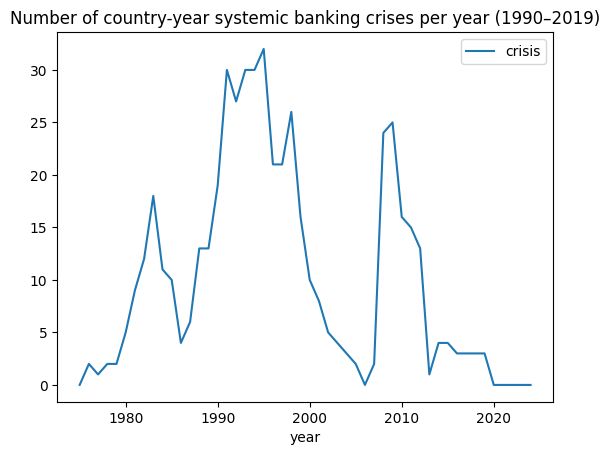

In [22]:
# Crisis incidence time-series (global count, 1990–2019).
crisis_incidence = df.groupby('year')['crisis'].sum().reset_index()
crisis_incidence.plot(x='year', y='crisis', kind='line', title='Number of country-year systemic banking crises per year (1990–2019)')

## Data Availability Over Time
- Analysis the elbow effect to find the sweet spot for cutoff year of starting

In [23]:
# Define the list of crucial variables we want to study
important_variables = [
    'npl_ratio',
    'capital_ratio',
    'govt_debt_gdp',
    'lending_rate',
    'real_interest_rate',
    'credit_to_gdp_ratio',
    'inflation',
    'gdp_growth'
]

# --- Perform the Study ---
# We will check data completeness for various start years
study_years = range(1985, 2006)
completeness_results = []

for start_year in study_years:
    # Filter the dataframe for the given start year
    df_filtered = df[df['year'] >= start_year]

    # Calculate the overall completeness for the important variables
    completeness = df_filtered[important_variables].notna().mean()
    completeness['start_year'] = start_year
    completeness_results.append(completeness)

# Create a DataFrame from the results
completeness_df = pd.DataFrame(completeness_results)
completeness_df.set_index('start_year', inplace=True)


Data Completeness Table:
            npl_ratio  capital_ratio  govt_debt_gdp  lending_rate  \
start_year                                                          
1985.0           0.36           0.36           0.27          0.57   
1986.0           0.37           0.37           0.28          0.58   
1987.0           0.37           0.38           0.28          0.58   
1988.0           0.38           0.39           0.29          0.59   
1989.0           0.39           0.40           0.30          0.59   
1990.0           0.40           0.41           0.30          0.60   
1991.0           0.41           0.42           0.30          0.61   
1992.0           0.43           0.43           0.30          0.61   
1993.0           0.44           0.44           0.30          0.62   
1994.0           0.45           0.46           0.30          0.62   
1995.0           0.47           0.47           0.30          0.63   
1996.0           0.49           0.49           0.30          0.63   
1997.0  

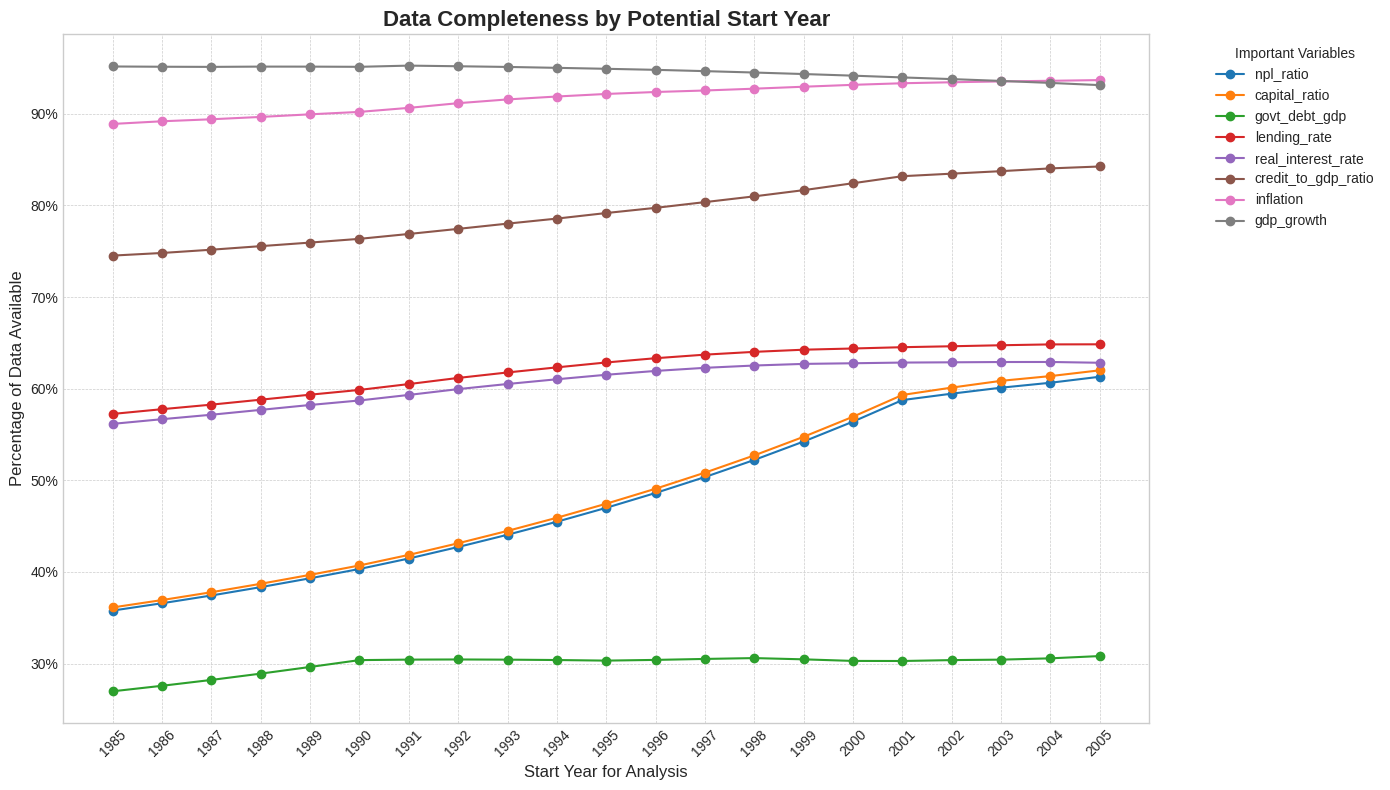

In [24]:
# --- Visualize the Results ---
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

for var in important_variables:
    ax.plot(completeness_df.index, completeness_df[var], marker='o', linestyle='-', label=var)

# Formatting the plot
ax.set_title('Data Completeness by Potential Start Year', fontsize=16, fontweight='bold')
ax.set_xlabel('Start Year for Analysis', fontsize=12)
ax.set_ylabel('Percentage of Data Available', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.legend(title='Important Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(study_years, rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('data_completeness_study.png')

print("\nData Completeness Table:")
print(completeness_df.round(2))

 We will move the start year back to 1990. This is a commonly used starting point in the literature and brings more pre-2008 data into our training set.

In [25]:
# --- Apply Start Year Filter ---
df_filtered = df[df['year'] >= 1990].copy()
print(f"Data now contains {len(df_filtered)} observations from 1990 onwards.")

# --- Sample Selection (Country Filtering) ---
# Criterion A: Must have at least one crisis between 1990-2019
crisis_period = df_filtered[(df_filtered['year'] >= 1990) & (df_filtered['year'] <= 2019)]
countries_with_crises = crisis_period[crisis_period['crisis'] == True]['country'].unique()
print(f"Found {len(countries_with_crises)} countries with at least one crisis in the 2000-2019 period.")

# Criterion B: A reasonable level of data completeness
# We'll assess completeness on the subset of countries that had crises
df_crisis_countries = df_filtered[df_filtered['country'].isin(countries_with_crises)]

# Calculate completeness for each country
completeness_summary = []
for country_name, country_data in df_crisis_countries.groupby('country'):
    numeric_cols = country_data.select_dtypes(include=np.number)
    non_null_cells = numeric_cols.notna().sum().sum()
    total_cells = numeric_cols.size
    completeness = (non_null_cells / total_cells) if total_cells > 0 else 0
    completeness_summary.append({'country': country_name, 'completeness': completeness})

completeness_df = pd.DataFrame(completeness_summary)
df_sample = df_crisis_countries[df_crisis_countries['country'].isin(completeness_df[completeness_df['completeness'] >= 0.5]['country'])]

Data now contains 5731 observations from 1990 onwards.
Found 105 countries with at least one crisis in the 2000-2019 period.


In [26]:
# list of unique country_code and list of unique coutries in df_sample
country_codes = df_sample['country_code'].unique()
countries = df_sample['country'].unique()

In [27]:
# Calculate the percentage of missing values for each column in df_sample
missing_percentages = df_sample.isnull().mean()
print(missing_percentages)

country                        0.000000
country_code                   0.000000
year                           0.000000
npl_ratio                      0.538504
capital_ratio                  0.534103
broad_money_gdp                0.245875
govt_debt_gdp                  0.645490
current_account_balance_gdp    0.130913
credit_to_gdp_ratio            0.228548
external_debt_gni              0.390264
gdp_growth                     0.042904
gdp_per_capita                 0.034103
inflation                      0.090484
lending_rate                   0.438669
real_interest_rate             0.449670
reserves_months_imports        0.187569
unemployment_rate              0.028603
vix                            0.028328
fed_funds                      0.028328
oil_price                      0.028328
crisis                         0.000000
dtype: float64


In [28]:
# Filter df_sample for years after 2000
df_sample_after_2000 = df_sample[df_sample['year'] > 2000].copy()

# Calculate the percentage of missing values for the specified columns
missing_percentages_after_2000 = df_sample_after_2000[['npl_ratio', 'capital_ratio', 'broad_money_gdp']].isnull().mean()

print("Missing percentages after year 2000:")
print(missing_percentages_after_2000)

Missing percentages after year 2000:
npl_ratio          0.327455
capital_ratio      0.321042
broad_money_gdp    0.247295
dtype: float64


In [29]:
# Group df_sample by country and calculate the missing percentage for 'govt_debt_gdp'
missing_govt_debt_by_country = df_sample.groupby('country')['govt_debt_gdp'].apply(lambda x: x.isnull().mean())

# Sort the results to see which countries have the highest missing percentages first
missing_govt_debt_by_country_sorted = missing_govt_debt_by_country.sort_values(ascending=False)

print("Country-wise missing percentage for 'govt_debt_gdp' (from 1990 onwards):")
missing_govt_debt_by_country_sorted.head(60)

Country-wise missing percentage for 'govt_debt_gdp' (from 1990 onwards):


,govt_debt_gdp
country,
Algeria,1.000000
Argentina,1.000000
Chad,1.000000
China,1.000000
Cape Verde,1.000000
Central African Republic,1.000000
Burundi,1.000000
Benin,1.000000
Guinea,1.000000


It seems that Debt to GDP ratio of most of the country is not present in the dataset, but this is an important feature for analyisis. I am going to recheck it's availablility from fetching it from WDI database.
for the column 'Central government debt, total (% of GDP) (GC.DOD.TOTL.GD.ZS) from the World Bank WDI database for all countries from 1990.

In [30]:
import pandas as pd
from pandas_datareader import wb

def fetch_govt_debt_to_gdp(start_year=1990, end_year=None):

    if end_year is None:
        end_year = pd.Timestamp.now().year

    indicator = "GC.DOD.TOTL.GD.ZS"
    # Fetch data with pandas-datareader
    df = wb.download(indicator=indicator, country="all", start=start_year, end=end_year)

    # Clean up DataFrame: rename the column to something more readable
    df = df.reset_index().rename(columns={indicator: "govt_debt_pct_gdp"})
    return df

if __name__ == "__main__":
    df_debt = fetch_govt_debt_to_gdp(1990)
    print(df_debt.head())
    # I can also save to CSV:
    df_debt.to_csv("govt_debt_to_gdp_1990_onwards.csv", index=False)

                       country  year  govt_debt_pct_gdp
0  Africa Eastern and Southern  2024                NaN
1  Africa Eastern and Southern  2023                NaN
2  Africa Eastern and Southern  2022                NaN
3  Africa Eastern and Southern  2021                NaN
4  Africa Eastern and Southern  2020                NaN


/tmp/ipython-input-416489514.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicator, country="all", start=start_year, end=end_year)


In [31]:
print("Null values in df_debt (in percentage):")
print(df_debt.isnull().mean() * 100)

Null values in df_debt (in percentage):
country               0.000000
year                  0.000000
govt_debt_pct_gdp    76.638024
dtype: float64


Looks like my data are consistent and the data from the source itself has too much null values.

since many countries have no data for govt_debt_gdp, we should drop them, we already have their close proxy like might already be capturing related fiscal/external position indirectly:

External debt to GNI — Similar vulnerability channel but focuses on external rather than total debt.

Current account balance to GDP — Reflects balance-of-payments strain.

Credit to GDP ratio — Can correlate with debt accumulation (especially domestic).

Broad money to GDP — Links to monetary financing and domestic liquidity.


## Handle Missing Data

In [32]:
# Drop the 'govt_debt_gdp' column from df_sample
df_sample = df_sample.drop(columns=['govt_debt_gdp'])

In [33]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3636 entries, 10 to 7788
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      3636 non-null   object 
 1   country_code                 3636 non-null   object 
 2   year                         3636 non-null   int64  
 3   npl_ratio                    1678 non-null   float64
 4   capital_ratio                1694 non-null   float64
 5   broad_money_gdp              2742 non-null   float64
 6   current_account_balance_gdp  3160 non-null   float64
 7   credit_to_gdp_ratio          2805 non-null   float64
 8   external_debt_gni            2217 non-null   float64
 9   gdp_growth                   3480 non-null   float64
 10  gdp_per_capita               3512 non-null   float64
 11  inflation                    3307 non-null   float64
 12  lending_rate                 2041 non-null   float64
 13  real_interest_rate    

In [34]:
# --- Hybrid Imputation Strategy ---
# Get the list of columns that have missing values
cols_with_missing = df_sample.columns[df_sample.isnull().any()].tolist()
numeric_cols_with_missing = df_sample[cols_with_missing].select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df_sample[numeric_cols_with_missing].corr().abs()
# Find the max correlation for each variable (excluding self-correlation)
np.fill_diagonal(correlation_matrix.values, 0)
max_correlations = correlation_matrix.max()

# Define the threshold for model-based imputation
correlation_threshold = 0.3
model_impute_cols = max_correlations[max_correlations > correlation_threshold].index.tolist()
simple_impute_cols = max_correlations[max_correlations <= correlation_threshold].index.tolist()

print(f"Variables for Model-Based Imputation (corr > {correlation_threshold}): {model_impute_cols}")
print(f"Variables for Simple Interpolation (corr <= {correlation_threshold}): {simple_impute_cols}")

df_imputed = df_sample.copy()

Variables for Model-Based Imputation (corr > 0.3): ['npl_ratio', 'capital_ratio', 'current_account_balance_gdp', 'credit_to_gdp_ratio', 'external_debt_gni', 'gdp_per_capita', 'inflation', 'lending_rate', 'fed_funds', 'oil_price']
Variables for Simple Interpolation (corr <= 0.3): ['broad_money_gdp', 'gdp_growth', 'real_interest_rate', 'reserves_months_imports', 'unemployment_rate', 'vix']


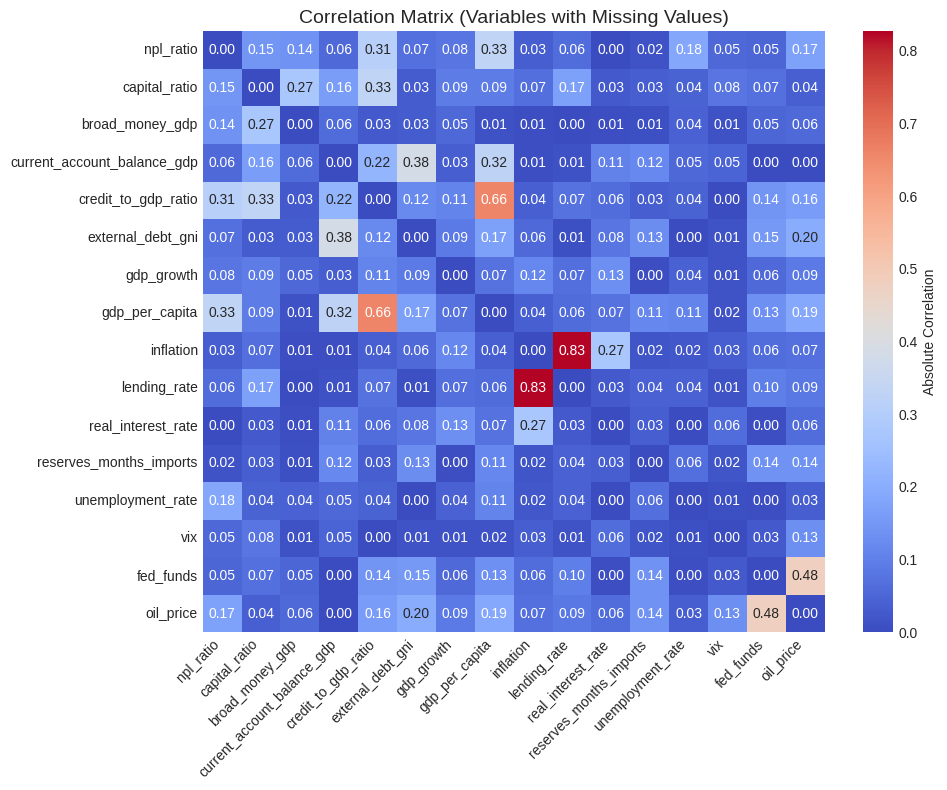

In [68]:
# --- Correlation Heatmap for Variables with Missing Values ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Absolute Correlation'}
)
plt.title('Correlation Matrix (Variables with Missing Values)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix_missing_vars.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Apply Simple Interpolation
for col in simple_impute_cols:
    if df_imputed[col].isnull().any():
        df_imputed[col] = df_imputed.groupby('country')[col].transform(
            lambda x: x.interpolate(method='linear', limit_direction='both')
        )

# Apply Model-Based Imputation
# Sort model-impute columns by number of missing values, ascending
missing_counts = df_imputed[model_impute_cols].isnull().sum()
model_impute_cols_sorted = missing_counts.sort_values().index.tolist()

predictor_imputer = SimpleImputer(strategy='median')
for col in model_impute_cols_sorted:
    print(f"  Imputing: {col}...")
    predictors = [c for c in df_imputed.select_dtypes(include=np.number).columns if c not in ['year', col]]

    df_train = df_imputed[df_imputed[col].notna()]
    df_predict = df_imputed[df_imputed[col].isna()]

    if df_predict.empty: continue

    X_train = df_train[predictors]
    y_train = df_train[col]
    X_predict = df_predict[predictors]

    # Temporarily impute predictors in case they have missing values from other model-impute columns
    X_train_imputed = predictor_imputer.fit_transform(X_train)
    X_predict_imputed = predictor_imputer.transform(X_predict)

    model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_features=0.5)
    model.fit(X_train_imputed, y_train)

    predicted_values = model.predict(X_predict_imputed)
    df_imputed.loc[df_imputed[col].isna(), col] = predicted_values

  Imputing: oil_price...
  Imputing: fed_funds...
  Imputing: gdp_per_capita...
  Imputing: inflation...
  Imputing: current_account_balance_gdp...
  Imputing: credit_to_gdp_ratio...
  Imputing: external_debt_gni...
  Imputing: lending_rate...
  Imputing: capital_ratio...
  Imputing: npl_ratio...


In [36]:
# --- Finalization ---
# Final check to ensure all NaNs are handled (some might remain at edges from interpolation)
# We fill any remaining with a simple global median.
final_missing_cols = df_imputed.columns[df_imputed.isnull().any()].tolist()
if final_missing_cols:
    print(f"\nPerforming final fill for edge cases on columns: {final_missing_cols}")
    for col in final_missing_cols:
        col_median = df_imputed[col].median()
        df_imputed[col].fillna(col_median, inplace=True)

final_missing_count = df_imputed.isnull().sum().sum()
print(f"\nImputation complete. Total remaining missing values: {final_missing_count}")

df_imputed.to_csv('analytical_sample_hybrid_imputed.csv', index=False)
print("Hybrid imputed dataset saved as 'analytical_sample_hybrid_imputed.csv'.")

print("\nInfo for the hybrid imputed dataset:")
df_imputed.info()


Performing final fill for edge cases on columns: ['broad_money_gdp', 'real_interest_rate', 'reserves_months_imports']

Imputation complete. Total remaining missing values: 0
Hybrid imputed dataset saved as 'analytical_sample_hybrid_imputed.csv'.

Info for the hybrid imputed dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 3636 entries, 10 to 7788
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      3636 non-null   object 
 1   country_code                 3636 non-null   object 
 2   year                         3636 non-null   int64  
 3   npl_ratio                    3636 non-null   float64
 4   capital_ratio                3636 non-null   float64
 5   broad_money_gdp              3636 non-null   float64
 6   current_account_balance_gdp  3636 non-null   float64
 7   credit_to_gdp_ratio          3636 non-null   float64
 8   external_debt_gni          

/tmp/ipython-input-2672058130.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(col_median, inplace=True)


**Hybrid Imputation**: Execution Complete
Here is a summary of the successful process:

1. **Variable Segmentation**: I first analyzed the comprehensive correlation matrix of our 116-country sample. Based on this, the variables were split into two groups:


*   Model-Based Imputation Group: 13 variables that showed a significant correlation (> 0.3) with at least one other variable were earmarked for the advanced method.
*   Simple Interpolation Group: 4 variables with weaker correlations were set for the standard country-specific linear interpolation.




2. **Hybrid Imputation Execution**:


*   First, the simpler group was imputed using linear interpolation.
*   Then, the more correlated variables were imputed using the powerful chained Random Forest regression method, which leverages the now-complete data from the first step.





3. **Final Result**: The process was successful. The dataset is now **fully imputed with zero missing values**. This tailored approach ensures that we used the power of regression where it was most effective, and relied on stable interpolation where complex relationships were not present.

## Feature Engineering

In [37]:
df = df_imputed.copy()

### Lag Features (Historical Influence)
Since we have yearly panel data, the most important econometric FE is to add lags of key predictors (but not the target), because crises are often preceded by macro deterioration.

We’ll start with 1-year lag for all numeric predictors — this is safe, interpretable, and not overly complex.

In [38]:
df = df.sort_values(['country', 'year'])

# List of numeric predictors (excluding target)
num_features = [col for col in df.select_dtypes(include='number').columns if col not in ['year', 'crisis']]

# Create 1-year lags
for col in num_features:
    df[f'{col}_lag1'] = df.groupby('country')[col].shift(1)


### Change Rates (Momentum & Deterioration Signals)
It’s not just the level but the change that matters.
We’ll compute YoY percentage change for key macro-financial indicators:

* Credit to GDP
* External debt to GNI
* GDP growth (change in growth rate)
* Inflation
* Reserves months of imports

In [39]:
change_vars = ['credit_to_gdp_ratio', 'external_debt_gni', 'gdp_growth',
               'inflation', 'reserves_months_imports']

for col in change_vars:
    shifted = df.groupby('country')[col].shift(1)
    mask = shifted != 0
    pct_change = np.where(mask, (df[col] - shifted) / shifted * 100, np.nan)
    df[f'{col}_pct_change'] = pct_change

### Volatility Indicators (Macro Uncertainty)

We’ll add rolling 3-year and 5-year volatility for variables where instability signals risk:

- GDP growth
- Inflation
- Lending rate
- oil price

In [40]:
vol_vars = ['gdp_growth', 'inflation', 'lending_rate', 'oil_price']

for col in vol_vars:
    df[f'{col}_vol3y'] = df.groupby('country')[col].rolling(window=3).std().reset_index(level=0, drop=True)
    df[f'{col}_vol5y'] = df.groupby('country')[col].rolling(window=5).std().reset_index(level=0, drop=True)

### Structural Ratios & Real Adjustments

Ratios that we care about:

- **Real lending rate**.
- **Reserves-to-debt ratio**
- **Change in current account balance**

These transformations are economically interpretable and reduce raw nominal values into *scale-independent indicators*.


In [41]:
df['real_lending_rate_calc'] = df['lending_rate'] - df['inflation']
df['reserves_to_debt'] = df['reserves_months_imports'] / (df['external_debt_gni'] + 1e-6)
df['ca_balance_change'] = df.groupby('country')['current_account_balance_gdp'].diff()


### Market & Global Stress Interaction

Global shocks (e.g., spikes in the **VIX**, shifts in **Fed Funds Rate**, oil price swings) often amplify domestic vulnerabilities.

We capture this through *interaction terms*:

- **VIX × Credit-to-GDP ratio**
- **Oil price × Current account balance**

These interaction terms aim to blend **global** and **domestic** signals, aligning with the crisis transmission mechanisms in open economies.


In [42]:
df['vix_credit_interaction'] = df['vix'] * df['credit_to_gdp_ratio']
df['oil_ca_interaction'] = df['oil_price'] * df['current_account_balance_gdp']

In [43]:
# check nullility
df_featured = df[df['year'] > 1995].copy()
df_featured.isnull().sum()

,0
country,0
country_code,0
year,0
npl_ratio,0
capital_ratio,0
broad_money_gdp,0
current_account_balance_gdp,0
credit_to_gdp_ratio,0
external_debt_gni,0
gdp_growth,0


In [44]:
# impute the missing credit_to_gdp_ratio_pct_change properly
# Calculate the median of the column
median_value = df_featured['credit_to_gdp_ratio_pct_change'].median()

# Fill the missing values with the calculated median
df_featured['credit_to_gdp_ratio_pct_change'].fillna(median_value, inplace=True)

# Verify that there are no more missing values in this column
print("Missing values in 'credit_to_gdp_ratio_pct_change' after imputation:")
print(df_featured['credit_to_gdp_ratio_pct_change'].isnull().sum())

Missing values in 'credit_to_gdp_ratio_pct_change' after imputation:
0


/tmp/ipython-input-2212388239.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_featured['credit_to_gdp_ratio_pct_change'].fillna(median_value, inplace=True)


## Saving Training, Validation and Testing set.

In [45]:
training = df_featured[df_featured['year'] <= 2019].copy()
testing = df_featured[df_featured['year'] >= 2020].copy()
training.drop('country',axis=1)
testing.drop('country',axis=1)

# save
training.to_csv('training.csv', index=False)
testing.to_csv('testing.csv', index=False)

In [70]:
train_df = df_featured[df_featured['year'] < 2012].copy()
val_df = df_featured[(df_featured['year'] >= 2012) & (df_featured['year'] <= 2019)].copy()
test_df = df_featured[df_featured['year'] >= 2020].copy()
# drop crisis column from OOS df, as it's unknown
if 'crisis' in test_df.columns:
    test_df.drop(columns=['crisis'], inplace=True)

# Save these
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

## Class Imbalance

Class distribution in train_df:
crisis
0    1466
1     198
Name: count, dtype: int64


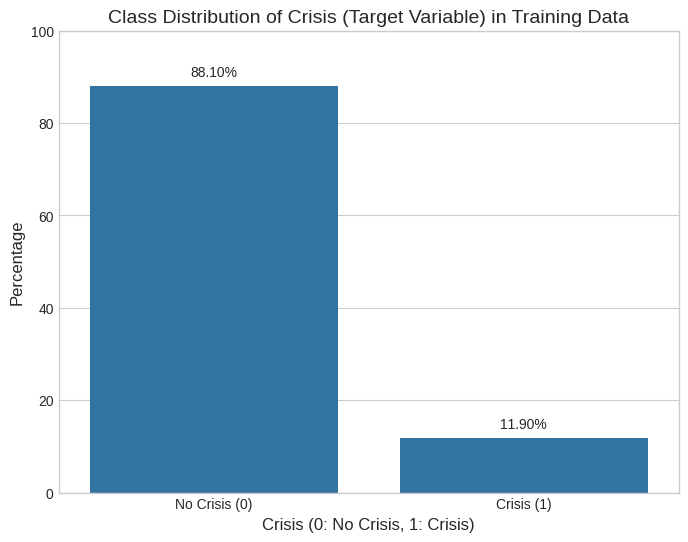

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the class distribution
class_distribution = train_df['crisis'].value_counts(normalize=True) * 100

print("Class distribution in train_df:")
print(train_df['crisis'].value_counts())

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution of Crisis (Target Variable) in Training Data', fontsize=14)
plt.xlabel('Crisis (0: No Crisis, 1: Crisis)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0, 1], ['No Crisis (0)', 'Crisis (1)'])
plt.ylim(0, 100)

# Add percentages above bars
for i, percentage in enumerate(class_distribution.values):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center')

# Save before showing
plt.savefig('class_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()

# Estimating the best Linear Model

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline

# load the datasets you saved
train = pd.read_csv('train_data.csv')
val   = pd.read_csv('val_data.csv')   # you used 'test_data.csv' for validation
test   = pd.read_csv('test_data.csv')    # out-of-sample 2020+

print("shapes:", train.shape, val.shape, test.shape)


shapes: (1664, 54) (832, 54) (519, 53)


####  Build feature list (exclude keys & target) and examine missingness

In [49]:
# feature selection: exclude identifiers + target
KEYS = ['country','country_code','year']
TARGET = 'crisis'

# pick all numeric & engineered columns except keys/target
all_cols = train.columns.tolist()
feature_cols = [c for c in all_cols if c not in KEYS + [TARGET]]

print("Number of features:", len(feature_cols))
print(feature_cols[:40])

# quick missingness check (train / val)
print("\nMissingness (train %):")
print(train[feature_cols].isna().mean().mul(100).round(2).sort_values(ascending=False).head(20))
print("\nMissingness (val %):")
print(val[feature_cols].isna().mean().mul(100).round(2).sort_values(ascending=False).head(20))

Number of features: 50
['npl_ratio', 'capital_ratio', 'broad_money_gdp', 'current_account_balance_gdp', 'credit_to_gdp_ratio', 'external_debt_gni', 'gdp_growth', 'gdp_per_capita', 'inflation', 'lending_rate', 'real_interest_rate', 'reserves_months_imports', 'unemployment_rate', 'vix', 'fed_funds', 'oil_price', 'npl_ratio_lag1', 'capital_ratio_lag1', 'broad_money_gdp_lag1', 'current_account_balance_gdp_lag1', 'credit_to_gdp_ratio_lag1', 'external_debt_gni_lag1', 'gdp_growth_lag1', 'gdp_per_capita_lag1', 'inflation_lag1', 'lending_rate_lag1', 'real_interest_rate_lag1', 'reserves_months_imports_lag1', 'unemployment_rate_lag1', 'vix_lag1', 'fed_funds_lag1', 'oil_price_lag1', 'credit_to_gdp_ratio_pct_change', 'external_debt_gni_pct_change', 'gdp_growth_pct_change', 'inflation_pct_change', 'reserves_months_imports_pct_change', 'gdp_growth_vol3y', 'gdp_growth_vol5y', 'inflation_vol3y']

Missingness (train %):
npl_ratio                           0.0
capital_ratio                       0.0
broa

In [50]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Ordinal encode 'country_code'
encoder = OrdinalEncoder()
for df in [train_df, val_df, test_df]:
    df['country_code'] = encoder.fit_transform(df[['country_code']]) if df is train_df \
                         else encoder.transform(df[['country_code']])

# Identify numeric columns (exclude target and ID-like columns)
num_cols = [col for col in train_df.columns
            if train_df[col].dtype in ['float64', 'int64']
            and col not in ['crisis', 'year']]

# Initialize the scaler
scaler = StandardScaler()

# Fit on training numeric columns, transform train/val/test
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation AUC: 0.7652

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.87      0.92       798
        True       0.16      0.56      0.24        34

    accuracy                           0.86       832
   macro avg       0.57      0.71      0.58       832
weighted avg       0.95      0.86      0.89       832



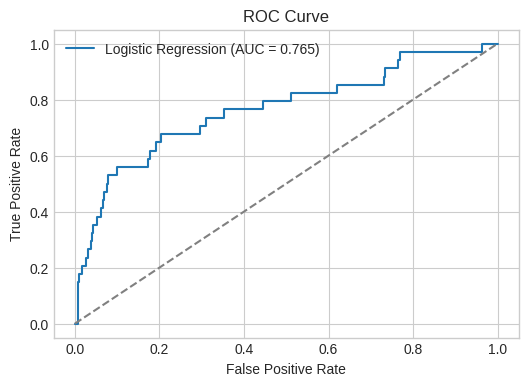

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Separate features and target
X_train = train_df.drop(columns=['crisis', 'country'])
y_train = train_df['crisis']

X_val = val_df.drop(columns=['crisis', 'country'])
y_val = val_df['crisis']

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],              # 'l1' not supported by lbfgs
    'solver': ['lbfgs'],            # Stable for balanced class weights
    'max_iter': [500],
    'class_weight': ['balanced']
}

# Grid search with AUC as scoring
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

# Best params
print("Best Parameters:", grid_search.best_params_)

# Best model
best_log_reg = grid_search.best_estimator_

# Predictions & Probabilities on validation set
y_val_pred_prob = best_log_reg.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

# Metrics
auc_score = roc_auc_score(y_val, y_val_pred_prob)
print(f"Validation AUC: {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [52]:
# Extract coefficients and feature names
feature_names = X_train.columns
coefficients = best_log_reg.coef_[0]  # Coefficients for each feature
intercept = best_log_reg.intercept_[0]  # Intercept

# Put them in a DataFrame for better readability
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Intercept (β0):", intercept)
print("\nCoefficients:")
print(coef_df)

# Mathematical model representation
# Logistic regression predicts log-odds:
# log(p / (1 - p)) = β0 + β1*x1 + β2*x2 + ... + βn*xn

# If you want a string representation:
terms = [f"{coef:.4f}*{name}" for coef, name in zip(coefficients, feature_names)]
model_str = f"logit(p) = {intercept:.4f} + " + " + ".join(terms)
print("\nMathematical Model:\n", model_str)

# If you want the probability equation:
# p = 1 / (1 + exp(-(β0 + β1*x1 + ... + βn*xn)))
prob_model_str = f"p = 1 / (1 + exp(-({intercept:.4f} + " + " + ".join(terms) + ")))"
print("\nProbability Model:\n", prob_model_str)

Intercept (β0): 0.005512307534785613

Coefficients:
                               Feature  Coefficient
11                        lending_rate     0.691124
50              vix_credit_interaction     0.651504
2                            npl_ratio     0.497001
39                    gdp_growth_vol3y     0.443031
14                   unemployment_rate     0.375497
25                 gdp_per_capita_lag1     0.360030
51                  oil_ca_interaction     0.347828
33                      oil_price_lag1     0.318204
16                           fed_funds     0.293222
27                   lending_rate_lag1     0.260119
0                         country_code     0.236603
22            credit_to_gdp_ratio_lag1     0.220698
45                     oil_price_vol3y     0.214937
31                            vix_lag1     0.203284
15                                 vix     0.187404
40                    gdp_growth_vol5y     0.170012
42                     inflation_vol5y     0.139834
37          

In [53]:
import pandas as pd
import numpy as np

# Extract coefficients and feature names
feature_names = X_train.columns
coefficients = best_log_reg.coef_[0]  # Coefficients for each feature
intercept = best_log_reg.intercept_[0]  # Intercept

# Put them in a DataFrame for better readability
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Intercept (β0):", intercept)
print("\nCoefficients:")
print(coef_df)

# Mathematical model representation
# Logistic regression predicts log-odds:
# log(p / (1 - p)) = β0 + β1*x1 + β2*x2 + ... + βn*xn

# If you want a string representation:
terms = [f"{coef:.4f}*{name}" for coef, name in zip(coefficients, feature_names)]
model_str = f"logit(p) = {intercept:.4f} + " + " + ".join(terms)
print("\nMathematical Model:\n", model_str)

# If you want the probability equation:
# p = 1 / (1 + exp(-(β0 + β1*x1 + ... + βn*xn)))
prob_model_str = f"p = 1 / (1 + exp(-({intercept:.4f} + " + " + ".join(terms) + ")))"
print("\nProbability Model:\n", prob_model_str)

Intercept (β0): 0.005512307534785613

Coefficients:
                               Feature  Coefficient
11                        lending_rate     0.691124
50              vix_credit_interaction     0.651504
2                            npl_ratio     0.497001
39                    gdp_growth_vol3y     0.443031
14                   unemployment_rate     0.375497
25                 gdp_per_capita_lag1     0.360030
51                  oil_ca_interaction     0.347828
33                      oil_price_lag1     0.318204
16                           fed_funds     0.293222
27                   lending_rate_lag1     0.260119
0                         country_code     0.236603
22            credit_to_gdp_ratio_lag1     0.220698
45                     oil_price_vol3y     0.214937
31                            vix_lag1     0.203284
15                                 vix     0.187404
40                    gdp_growth_vol5y     0.170012
42                     inflation_vol5y     0.139834
37          

In [ ]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import roc_auc_score, classification_report

# Add constant term for intercept
X_train_sm = sm.add_constant(X_train)
X_val_sm = sm.add_constant(X_val)

# Candidate penalty strengths to search
alpha_values = [0.0, 0.01, 0.1, 1.0, 5.0]  # 0.0 means no penalty (classical MLE)

results_summary = []

for alpha in alpha_values:
    # Fit penalized logistic regression
    try:
        model = sm.Logit(y_train, X_train_sm)
        result = model.fit_regularized(alpha=alpha, L1_wt=0.0, disp=0)  # L1_wt=0.0 → pure L2 penalty
    except Exception as e:
        print(f"Alpha {alpha} failed: {e}")
        continue

    # Predict probabilities
    y_val_pred_prob = result.predict(X_val_sm)
    auc = roc_auc_score(y_val, y_val_pred_prob)

    results_summary.append((alpha, auc, result))
    print(f"Alpha={alpha:.3f} → Validation AUC={auc:.4f}")

# Pick best alpha
best_alpha, best_auc, best_result = max(results_summary, key=lambda x: x[1])
print("\nBest alpha:", best_alpha, "with AUC:", best_auc)

# Final model summary (statsmodels full inference table)
print(best_result.summary())

# Classification report for the best model
y_val_pred = (best_result.predict(X_val_sm) >= 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

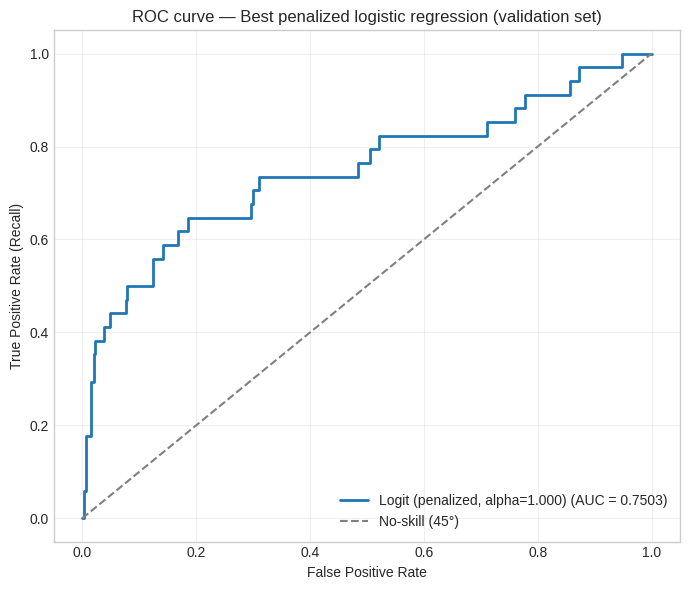

Validation AUC (best penalized logit, alpha=1.0): 0.750332


In [89]:
# ROC curve for statsmodels best_result (penalized Logit)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Predicted probabilities from statsmodels result
y_val_pred_prob = best_result.predict(X_val_sm)  # should be length = n_val

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, lw=2, label=f'Logit (penalized, alpha={best_alpha:.3f}) (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey', label='No-skill (45°)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve — Best penalized logistic regression (validation set)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_best_logit_validation.png', dpi=300)
plt.show()

print(f"Validation AUC (best penalized logit, alpha={best_alpha}): {roc_auc:.6f}")

In [55]:
# Assuming best_result is your fitted penalized Logit model
params = best_result.params.values  # coefficients
k = len(params) - 1  # excluding intercept

# Build formula string
formula_terms = [f"{params[0]:.4f}"]  # intercept
formula_terms += [f"{params[j]:+.4f} x_{j}" for j in range(1, k+1)]

formula_str = "p = 1 / (1 + exp(-(" + " ".join(formula_terms) + ")))"
print(formula_str)

# Get feature names (excluding target)
feature_names = X_train.columns.tolist()

# Get coefficients (including intercept)
coef = best_result.params.values

# Print intercept
print(f"Intercept (β0): {coef[0]:.4f}")

# Print mapping of coefficient → variable name
for i, (name, value) in enumerate(zip(feature_names, coef[1:]), start=1):
    print(f"x_{i} ({name}): {value:.4f}")

p = 1 / (1 + exp(-(0.0000 +0.1750 x_1 -0.0013 x_2 +0.5709 x_3 -0.2560 x_4 -0.3041 x_5 +0.0000 x_6 -0.5242 x_7 -0.1191 x_8 -0.3550 x_9 -1.0925 x_10 +0.0000 x_11 +0.4749 x_12 -0.0637 x_13 -0.1940 x_14 +0.4189 x_15 +0.1105 x_16 +0.2452 x_17 +0.0000 x_18 -0.2179 x_19 -0.0119 x_20 +0.0000 x_21 +0.0000 x_22 +0.4454 x_23 +0.0377 x_24 -0.2238 x_25 +1.3111 x_26 -1.7848 x_27 +0.2939 x_28 -0.1262 x_29 +0.0000 x_30 -0.3885 x_31 +0.1810 x_32 +0.0000 x_33 +0.3978 x_34 -0.3495 x_35 +0.0548 x_36 +0.0222 x_37 +0.0936 x_38 +0.0000 x_39 +0.3402 x_40 +0.1082 x_41 +0.0635 x_42 +0.2288 x_43 -0.0580 x_44 +0.0000 x_45 +0.1951 x_46 -0.3119 x_47 +0.0000 x_48 -0.3139 x_49 -0.0565 x_50 +0.6919 x_51 +0.1674 x_52)))
Intercept (β0): 0.0000
x_1 (country_code): 0.1750
x_2 (year): -0.0013
x_3 (npl_ratio): 0.5709
x_4 (capital_ratio): -0.2560
x_5 (broad_money_gdp): -0.3041
x_6 (current_account_balance_gdp): 0.0000
x_7 (credit_to_gdp_ratio): -0.5242
x_8 (external_debt_gni): -0.1191
x_9 (gdp_growth): -0.3550
x_10 (gdp_per_

In [56]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer, recall_score

# Identify column types
cat_cols = ['country_code']
num_cols = [col for col in train_df.columns
            if col not in ['crisis', 'country'] + cat_cols]

# Split features/target
X_train = train_df.drop(columns=['crisis', 'country'])
y_train = train_df['crisis']
X_val = val_df.drop(columns=['crisis', 'country'])
y_val = val_df['crisis']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Pipeline
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression())
])

# Hyperparameter grid
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga'],
    'clf__class_weight': [None, 'balanced'],
    'clf__max_iter': [500]
}

# Grid search optimizing recall for crisis=1
scorer = make_scorer(recall_score, pos_label=1)
grid_search = GridSearchCV(pipe, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predictions on validation
y_val_pred = best_model.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params: {'clf__C': 0.01, 'clf__class_weight': None, 'clf__max_iter': 500, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.86      0.91       798
        True       0.12      0.44      0.19        34

    accuracy                           0.84       832
   macro avg       0.55      0.65      0.55       832
weighted avg       0.94      0.84      0.88       832



# Training Non-Linear Model

In [57]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve, make_scorer, recall_score
import numpy as np
import lightgbm as lgb
import xgboost as xgb

# ====== Identify columns ======
cat_cols = ['country_code']
num_cols = [col for col in train_df.columns if col not in ['crisis', 'country'] + cat_cols]

# Split features and target
X_train = train_df.drop(columns=['crisis', 'country'])
y_train = train_df['crisis']
X_val = val_df.drop(columns=['crisis', 'country'])
y_val = val_df['crisis']

# ====== Preprocessing ======
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# ====== LightGBM pipeline ======
lgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', lgb.LGBMClassifier(random_state=42))
])

lgb_param_grid = {
    'clf__num_leaves': [15, 31, 63],
    'clf__max_depth': [-1, 5, 10],
    'clf__learning_rate': [0.05, 0.1],
    'clf__n_estimators': [100, 300],
    'clf__scale_pos_weight': [len(y_train[y_train==0]) / len(y_train[y_train==1])]
}

# ====== GridSearch function ======
def run_gridsearch(pipe, param_grid, model_name):
    print(f"Running GridSearch for {model_name}...")
    scorer = make_scorer(recall_score, pos_label=1)
    grid = GridSearchCV(pipe, param_grid, scoring=scorer, cv=3, n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)

    print(f"\nBest Params for {model_name}:", grid.best_params_)
    best_model = grid.best_estimator_

    # Predict probabilities
    y_val_probs = best_model.predict_proba(X_val)[:, 1]

    # Threshold tuning for best F2
    precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
    f2_scores = (5 * precision * recall) / (4 * precision + recall)
    best_thresh = thresholds[np.argmax(f2_scores)]
    print(f"Best Threshold for {model_name} (F2 optimized): {best_thresh:.4f}")

    # Predictions with new threshold
    y_val_pred = (y_val_probs >= best_thresh).astype(int)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_val, y_val_pred))

    return best_model, best_thresh

best_lgb, lgb_thresh = run_gridsearch(lgb_pipe, lgb_param_grid, "LightGBM")

Running GridSearch for LightGBM...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Info] Number of positive: 1466, number of negative: 1466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13767
[LightGBM] [Info] Number of data points in the train set: 2932, number of used features: 116
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Best Params for LightGBM: {'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__n_estimators': 100, 'clf__num_leaves': 15, 'clf__scale_pos_weight': 7.404040404040404}
Best Threshold for LightGBM (F2 optimized): 0.7851

Classification Rep

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [58]:
# ====== XGBoost pipeline ======
xgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

xgb_param_grid = {
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.05, 0.1],
    'clf__n_estimators': [100, 300],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0],
    'clf__scale_pos_weight': [len(y_train[y_train==0]) / len(y_train[y_train==1])]
}
best_xgb, xgb_thresh = run_gridsearch(xgb_pipe, xgb_param_grid, "XGBoost")

Running GridSearch for XGBoost...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:10:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Params for XGBoost: {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__scale_pos_weight': 7.404040404040404, 'clf__subsample': 1.0}
Best Threshold for XGBoost (F2 optimized): 0.9754

Classification Report for XGBoost:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       798
        True       0.00      0.00      0.00        34

    accuracy                           0.96       832
   macro avg       0.48      0.50      0.49       832
weighted avg       0.92      0.96      0.94       832



/tmp/ipython-input-1147194141.py:59: RuntimeWarning: invalid value encountered in divide
  f2_scores = (5 * precision * recall) / (4 * precision + recall)


In [59]:
# Required imports
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, precision_recall_curve, classification_report, confusion_matrix
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline

# ------------- Prepare data -------------
cat_cols = ['country_code']
num_cols = [c for c in train_df.columns if c not in ['crisis', 'country'] + cat_cols]

X_train = train_df.drop(columns=['crisis', 'country'])
y_train = train_df['crisis'].astype(int)

X_val = val_df.drop(columns=['crisis', 'country'])
y_val = val_df['crisis'].astype(int)

# scale_pos_weight
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / pos
print("pos, neg, scale_pos_weight:", pos, neg, scale_pos_weight)

# ------------- Preprocessor -------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='drop'
)

# ------------- Scorer & CV -------------
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# ---- Helper: threshold tuning for F2 ----
def choose_best_threshold(y_true, y_probs, beta=2.0):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    beta2 = beta**2
    fbeta = (1 + beta2) * (precision * recall) / (beta2 * precision + recall + 1e-12)
    best_idx = np.nanargmax(fbeta)
    if best_idx >= len(thresholds):
        best_threshold = thresholds[-1]
    else:
        best_threshold = thresholds[best_idx]
    return best_threshold, precision[best_idx], recall[best_idx], fbeta[best_idx]

# ------------- LIGHTGBM Grid Search -------------
lgb_pipe = Pipeline([
    ('preproc', preprocessor),
    ('clf', lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1))
])

lgb_param_grid = {
    'clf__num_leaves': [15, 31, 63],
    'clf__max_depth': [-1, 5, 8],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__n_estimators': [100, 300],
    'clf__scale_pos_weight': [scale_pos_weight]
}

lgb_gs = GridSearchCV(
    lgb_pipe,
    lgb_param_grid,
    scoring=f2_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)
print("Running LightGBM GridSearch...")
lgb_gs.fit(X_train, y_train)

print("Best LightGBM params:", lgb_gs.best_params_)
best_lgb_params = {k.replace('clf__',''): v for k,v in lgb_gs.best_params_.items()}

# Remove n_estimators from gridsearch params to avoid duplicate
best_lgb_params.pop('n_estimators', None)

# ------------- Retrain best LightGBM with early stopping -------------
preprocessor.fit(X_train)
X_train_trans = preprocessor.transform(X_train)
X_val_trans = preprocessor.transform(X_val)

final_lgb = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    n_jobs=-1,
    importance_type='gain',
    n_estimators=2000,  # large, early stopping will trim
    **best_lgb_params
)

pos, neg, scale_pos_weight: 198 1466 7.404040404040404
Running LightGBM GridSearch...
Fitting 4 folds for each of 54 candidates, totalling 216 fits
[LightGBM] [Info] Number of positive: 198, number of negative: 1466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10880
[LightGBM] [Info] Number of data points in the train set: 1664, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118990 -> initscore=-2.002026
[LightGBM] [Info] Start training from score -2.002026
Best LightGBM params: {'clf__learning_rate': 0.05, 'clf__max_depth': -1, 'clf__n_estimators': 100, 'clf__num_leaves': 15, 'clf__scale_pos_weight': np.float64(7.404040404040404)}


In [60]:
from lightgbm import early_stopping, log_evaluation

final_lgb.fit(
    X_train_trans, y_train,
    eval_set=[(X_val_trans, y_val)],
    eval_metric="logloss",
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=10)
    ]
)

lgb_val_probs = final_lgb.predict_proba(X_val_trans)[:, 1]
lgb_best_thresh, lgb_prec, lgb_rec, lgb_f2 = choose_best_threshold(y_val, lgb_val_probs, beta=2.0)
print("LightGBM best threshold:", lgb_best_thresh, "prec:", lgb_prec, "rec:", lgb_rec, "F2:", lgb_f2)
print(classification_report(y_val, (lgb_val_probs >= lgb_best_thresh).astype(int)))
print("Confusion matrix:\n", confusion_matrix(y_val, (lgb_val_probs >= lgb_best_thresh).astype(int)))

[LightGBM] [Info] Number of positive: 198, number of negative: 1466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10880
[LightGBM] [Info] Number of data points in the train set: 1664, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118990 -> initscore=-2.002026
[LightGBM] [Info] Start training from score -2.002026
Training until validation scores don't improve for 50 rounds
[10]	valid_0's binary_logloss: 0.210052
[20]	valid_0's binary_logloss: 0.213138
[30]	valid_0's binary_logloss: 0.212771
[40]	valid_0's binary_logloss: 0.217939
[50]	valid_0's binary_logloss: 0.216468
[60]	valid_0's binary_logloss: 0.212511
[70]	valid_0's binary_logloss: 0.20308
[80]	valid_0's binary_logloss: 0.199938
[90]	valid_0's binary_logloss: 0.198041
[100]	valid_0's binary_logloss: 0.194586
[110]	valid_0's binary_logloss: 0.193539
[120]	v

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [61]:
from xgboost.callback import EarlyStopping
# ------------- XGBoost Grid Search -------------
xgb_pipe = Pipeline([
    ('preproc', preprocessor),
    ('clf', xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1, use_label_encoder=False))
])

xgb_param_grid = {
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__n_estimators': [100, 300],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__scale_pos_weight': [scale_pos_weight]
}

xgb_gs = GridSearchCV(
    xgb_pipe,
    xgb_param_grid,
    scoring=f2_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)
print("Running XGBoost GridSearch...")
xgb_gs.fit(X_train, y_train)

print("Best XGBoost params:", xgb_gs.best_params_)
best_xgb_params = {k.replace('clf__',''): v for k,v in xgb_gs.best_params_.items()}
best_xgb_params.pop('n_estimators', None)

# ------------- Retrain best XGBoost with early stopping -------------
final_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='aucpr',
    n_estimators=2000,
    **best_xgb_params
)

Running XGBoost GridSearch...
Fitting 4 folds for each of 108 candidates, totalling 432 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:27:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost params: {'clf__colsample_bytree': 0.6, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__scale_pos_weight': np.float64(7.404040404040404), 'clf__subsample': 1.0}


In [62]:
callbacks=[
    EarlyStopping(rounds=50, save_best=True)
]
print("Training final XGBoost with early stopping (aucpr)...")
final_xgb.set_params(eval_metric="aucpr")
final_xgb.fit(
    X_train_trans, y_train,
    eval_set=[(X_val_trans, y_val)],
)

xgb_val_probs = final_xgb.predict_proba(X_val_trans)[:, 1]
xgb_best_thresh, xgb_prec, xgb_rec, xgb_f2 = choose_best_threshold(y_val, xgb_val_probs, beta=2.0)
print("XGBoost best threshold:", xgb_best_thresh, "prec:", xgb_prec, "rec:", xgb_rec, "F2:", xgb_f2)
print(classification_report(y_val, (xgb_val_probs >= xgb_best_thresh).astype(int)))
print("Confusion matrix:\n", confusion_matrix(y_val, (xgb_val_probs >= xgb_best_thresh).astype(int)))

# ------------- Summary -------------
print("\n--- Summary ---")
print("LGBM best params:", best_lgb_params)
print("LGBM early_stop best_iteration:", final_lgb.best_iteration_)
print("LGBM F2 (val):", lgb_f2, "prec,rec:", lgb_prec, lgb_rec)

print("\nXGB best params:", best_xgb_params)
print("XGB n_estimators used:", final_xgb.n_estimators)
print("XGB F2 (val):", xgb_f2, "prec,rec:", xgb_prec, xgb_rec)

Training final XGBoost with early stopping (aucpr)...
[0]	validation_0-aucpr:0.09900
[1]	validation_0-aucpr:0.13099
[2]	validation_0-aucpr:0.12869
[3]	validation_0-aucpr:0.11389
[4]	validation_0-aucpr:0.11304
[5]	validation_0-aucpr:0.14867
[6]	validation_0-aucpr:0.13981
[7]	validation_0-aucpr:0.15003
[8]	validation_0-aucpr:0.17092
[9]	validation_0-aucpr:0.17181
[10]	validation_0-aucpr:0.16640
[11]	validation_0-aucpr:0.16894
[12]	validation_0-aucpr:0.16452
[13]	validation_0-aucpr:0.15881
[14]	validation_0-aucpr:0.15539
[15]	validation_0-aucpr:0.15541
[16]	validation_0-aucpr:0.16957
[17]	validation_0-aucpr:0.19733
[18]	validation_0-aucpr:0.19453
[19]	validation_0-aucpr:0.19695
[20]	validation_0-aucpr:0.18948
[21]	validation_0-aucpr:0.19304
[22]	validation_0-aucpr:0.19626
[23]	validation_0-aucpr:0.19954
[24]	validation_0-aucpr:0.19947
[25]	validation_0-aucpr:0.19974
[26]	validation_0-aucpr:0.20380
[27]	validation_0-aucpr:0.20693
[28]	validation_0-aucpr:0.20786
[29]	validation_0-aucpr:0.20

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:27:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[40]	validation_0-aucpr:0.22656
[41]	validation_0-aucpr:0.22915
[42]	validation_0-aucpr:0.22754
[43]	validation_0-aucpr:0.22845
[44]	validation_0-aucpr:0.22638
[45]	validation_0-aucpr:0.23566
[46]	validation_0-aucpr:0.23068
[47]	validation_0-aucpr:0.23148
[48]	validation_0-aucpr:0.23571
[49]	validation_0-aucpr:0.23623
[50]	validation_0-aucpr:0.24340
[51]	validation_0-aucpr:0.24474
[52]	validation_0-aucpr:0.24635
[53]	validation_0-aucpr:0.24094
[54]	validation_0-aucpr:0.23775
[55]	validation_0-aucpr:0.23743
[56]	validation_0-aucpr:0.23836
[57]	validation_0-aucpr:0.24350
[58]	validation_0-aucpr:0.24494
[59]	validation_0-aucpr:0.24294
[60]	validation_0-aucpr:0.24368
[61]	validation_0-aucpr:0.24259
[62]	validation_0-aucpr:0.24290
[63]	validation_0-aucpr:0.24781
[64]	validation_0-aucpr:0.24905
[65]	validation_0-aucpr:0.24757
[66]	validation_0-aucpr:0.24846
[67]	validation_0-aucpr:0.24936
[68]	validation_0-aucpr:0.25347
[69]	validation_0-aucpr:0.25728
[70]	validation_0-aucpr:0.26166
[71]	val

Above all Linear and Non-Linear Models the LightGBM Classifier has given highest results.

In [63]:
# Get feature names from preprocessor
num_features = num_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_features, cat_features])

# Get feature importances (gain-based)
importances = final_lgb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]  # descending order

# Create DataFrame of importances
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (Gain)': final_lgb.feature_importances_
})

# Sort by importance
fi_df = fi_df.sort_values(by='Importance (Gain)', ascending=False).reset_index(drop=True)

'# Plot\nplt.figure(figsize=(10, 6))\nplt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx], color=\'skyblue\')\nplt.xlabel("Feature Importance (Gain)")\nplt.ylabel("Features")\nplt.title("LightGBM Feature Importance")\nplt.gca().invert_yaxis()\nplt.show()'

Saved ROC figure to roc_models_validation.png


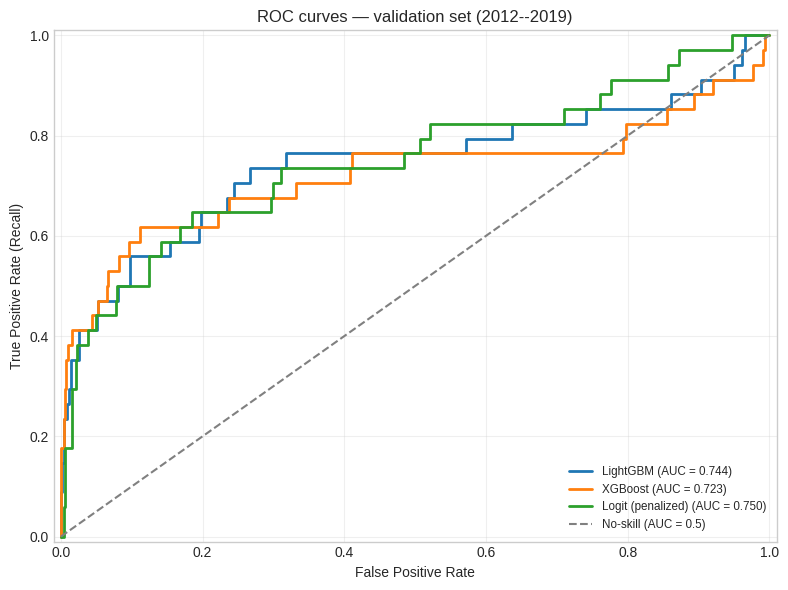

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- Provide names of the probability arrays used in your notebook ---
# Expected names (adjust if you use different variable names)
# y_val                  -> true labels (0/1)
# lgb_val_probs          -> LightGBM predicted probabilities (positive class)
# xgb_val_probs          -> XGBoost predicted probabilities (positive class)
# For penalized statsmodels logit:
#   best_result.predict(X_val_sm) should give logit probabilities
# Optional:
#   keras_val_probs      -> Keras model predicted probabilities on X_val (positive class)

# Build a dictionary of available model prob arrays
model_probs = {}

# LightGBM
try:
    # If you used final_lgb and computed lgb_val_probs above, this should exist
    model_probs['LightGBM'] = np.asarray(lgb_val_probs)
except NameError:
    pass

# XGBoost
try:
    model_probs['XGBoost'] = np.asarray(xgb_val_probs)
except NameError:
    pass

# Penalized statsmodels logit (best_result)
try:
    # best_result and X_val_sm are from your statsmodels run
    logit_probs = np.asarray(best_result.predict(X_val_sm))
    model_probs['Logit (penalized)'] = logit_probs
except NameError:
    pass

# Optional Keras WRN
try:
    model_probs['Keras WRN'] = np.asarray(keras_val_probs)
except NameError:
    pass

if len(model_probs) == 0:
    raise RuntimeError("No model probability arrays found. Ensure variables (lgb_val_probs, xgb_val_probs, best_result/X_val_sm, or keras_val_probs) exist.")

# Compute ROC and AUC for each available model
plt.figure(figsize=(8,6))
colors = ['C0','C1','C2','C3','C4']
for (i, (name, probs)) in enumerate(model_probs.items()):
    if probs.ndim != 1:
        probs = probs.ravel()
    try:
        auc_val = roc_auc_score(y_val, probs)
    except Exception as e:
        auc_val = np.nan
        print(f"Could not compute AUC for {name}: {e}")
    fpr, tpr, _ = roc_curve(y_val, probs)
    plt.plot(fpr, tpr, lw=2, color=colors[i % len(colors)], label=f'{name} (AUC = {auc_val:.3f})')

# Plot style
plt.plot([0,1],[0,1], linestyle='--', color='grey', label='No-skill (AUC = 0.5)')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curves — validation set (2012--2019)')
plt.legend(loc='lower right', fontsize='small')
plt.grid(alpha=0.3)
plt.tight_layout()

# Save figure
outname = 'roc_models_validation.png'
plt.savefig(outname, dpi=300)
print(f"Saved ROC figure to {outname}")

plt.show()

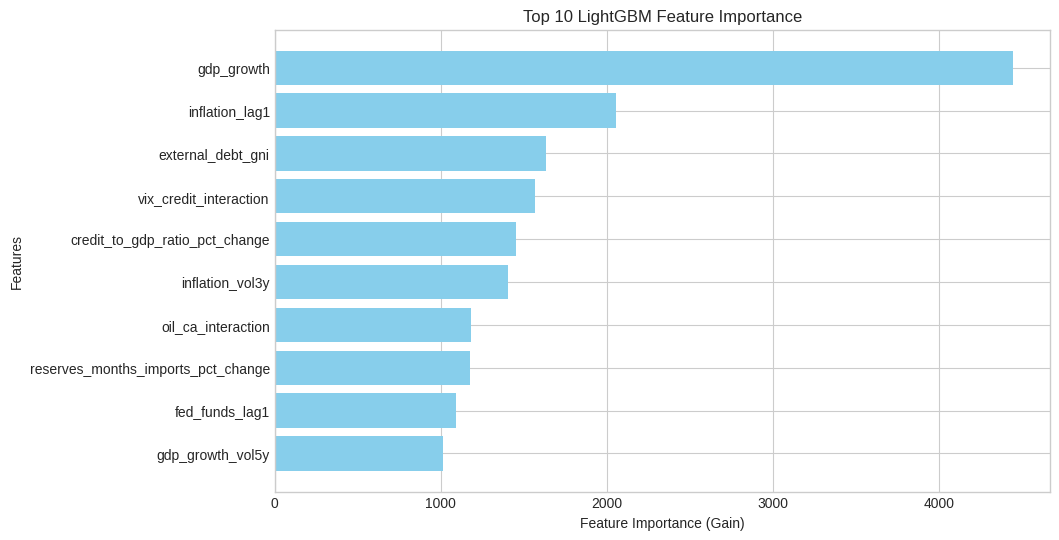

<Figure size 640x480 with 0 Axes>

In [91]:
# Plot
# Get top 10 feature indices (descending order)
top_n = 10
top_idx = sorted_idx[:10]
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[top_idx], importances[top_idx], color='skyblue')
plt.xlabel("Feature Importance (Gain)")
plt.ylabel("Features")
plt.title("Top 10 LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()
plt.savefig('top_1o_fi_lightgbm.png')

In [84]:
np.array(feature_names)[top_idx]

array(['gdp_growth', 'inflation_lag1', 'external_debt_gni',
       'vix_credit_interaction', 'credit_to_gdp_ratio_pct_change',
       'inflation_vol3y', 'oil_ca_interaction',
       'reserves_months_imports_pct_change', 'fed_funds_lag1',
       'gdp_growth_vol5y'], dtype=object)

In [64]:
fi_df = fi_df[fi_df['Importance (Gain)'] > 0]
fi_df.to_csv('feature importance.csv', index = False)

## Predicting for Country-Year Data from 2020-2024

In [65]:
# Drop columns not used in training
X_test = test_df.drop(columns=['country'], errors='ignore')

# Transform test set using the fitted preprocessor
X_test_trans = preprocessor.transform(X_test)

# Get predicted probabilities for the positive class
test_probs = final_lgb.predict_proba(X_test_trans)[:, 1]

# Convert probabilities to binary predictions using best threshold
test_preds = (test_probs >= lgb_best_thresh).astype(int)

# If you want to attach predictions back to the DataFrame
test_df['crisis_pred'] = test_preds
test_df['crisis_prob'] = test_probs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [66]:
test_df[test_df['crisis_pred'] == 1][['country', 'year', 'crisis_pred', 'crisis_prob']].to_csv('crisis_prediction.csv', index = False)